In [59]:
import pandas as pd
df2= pd.read_csv("data2/환율.csv")
df2

df2['국가명'] = df2['국가명'].str.replace(pat=r'\'', repl=r'', regex=True)
df2['국가명'] 

country_name=[]
for i in df2['국가명']:
    a = i.split('(')
    country_name.append(a[0])
df2['국가명'] =country_name  

df1= pd.read_csv("data2/country_2022.csv")
df3= pd.read_csv("data2/GDP.csv")
df4= pd.read_csv("data2/금리.csv")


In [119]:
merged_df = pd.merge(df1,df2,on='국가명')
merged_df
print(merged_df)
merged_df2 = pd.merge(df3,df4,on='국가명')
merged_dff = pd.merge(merged_df2,merged_df,on='국가명')
merged_dff
#merged_dff.to_csv('merged_data.csv',header=True,index=False)

         국가명         무역수지        환율
0        베트남   34,238,963  23159.78
1         미국   27,980,983      1.00
2         홍콩   25,773,581      7.77
3         인도    9,972,967     73.92
4       싱가포르    9,857,627      1.34
..       ...          ...       ...
115      이라크   -8,333,092   1450.00
116     쿠웨이트  -12,000,388      0.30
117      카타르  -16,040,638      3.64
118       일본  -24,105,517    109.75
119  사우디아라비아  -36,775,118      3.75

[120 rows x 3 columns]


,국가명,국내총생산,1인당 총생산,대출금리,무역수지,환율
0,가나,7.549000e+10,2410.0,-,"171,956",5.81
1,가이아나,4.300000e+09,54680.0,8.88,"26,684",208.50
2,감비아,2.000000e+09,7870.0,19.5,"-1,219",51.48
3,과테말라,7.710000e+10,42890.0,12.19,"191,401",7.73
4,그레나다,1.000000e+09,91860.0,6.55,"2,744",2.70
...,...,...,...,...,...,...
73,페루,2.040000e+11,60830.0,10.98,"-2,069,271",3.88
74,폴란드,5.960000e+11,15700.0,-,"6,767,425",3.86
75,피지,4.545000e+09,5070.0,5.94,"274,704",2.07
76,필리핀,3.940000e+11,35720.0,-,"7,128,466",49.26


In [62]:
data= pd.read_csv("merged_data.csv")
data

,국가명,국내총생산,1인당 총생산,대출금리,무역수지,환율
0,가나,7.549000e+10,2410.0,-,"171,956",5.81
1,가이아나,4.300000e+09,54680.0,8.88,"26,684",208.50
2,감비아,2.000000e+09,7870.0,19.5,"-1,219",51.48
3,과테말라,7.710000e+10,42890.0,12.19,"191,401",7.73
4,그레나다,1.000000e+09,91860.0,6.55,"2,744",2.70
...,...,...,...,...,...,...
73,페루,2.040000e+11,60830.0,10.98,"-2,069,271",3.88
74,폴란드,5.960000e+11,15700.0,-,"6,767,425",3.86
75,피지,4.545000e+09,5070.0,5.94,"274,704",2.07
76,필리핀,3.940000e+11,35720.0,-,"7,128,466",49.26


In [92]:
out= data[data['대출금리'] =='-'].index
out
data =data.drop(out)
data = data.dropna()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer

# 데이터 준비
data_f = data[['국내총생산', '1인당 총생산', '대출금리', '무역수지', '환율']]
data_f

data_f_copy = data_f.copy()
data_f_copy['무역수지'] = data_f_copy['무역수지'].str.replace(',', '').astype(float)
data_f = data_f_copy
data_f

,국내총생산,1인당 총생산,대출금리,무역수지,환율
1,4.300000e+09,54680.0,8.88,26684.0,208.50
2,2.000000e+09,7870.0,19.5,-1219.0,51.48
3,7.710000e+10,42890.0,12.19,191401.0,7.73
4,1.000000e+09,91860.0,6.55,2744.0,2.70
5,1.100000e+10,42110.0,6.86,-6970.0,14.78
...,...,...,...,...,...
70,5.290000e+10,123730.0,6.94,576983.0,1.00
71,3.596000e+10,62950.0,12.51,42171.0,6774.16
73,2.040000e+11,60830.0,10.98,-2069271.0,3.88
75,4.545000e+09,5070.0,5.94,274704.0,2.07


In [98]:
from sklearn.cluster import KMeans # model 
from sklearn.datasets import load_iris # dataset 
import matplotlib.pyplot as plt # 시각화 
from sklearn.preprocessing import StandardScaler
#표준화
scaler = StandardScaler()
scale_f = scaler.fit_transform(data_f) 

size = range(1, 11) # k값 범위
inertia = [] # 응집도 (중심점과 포인트 간 거리 제곱합)
for k in size : 
    obj = KMeans(n_clusters = k) 
    model = obj.fit(scale_f)
    inertia.append(model.inertia_) 

print(inertia)

D:\Users\yujin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[330.0, 251.14209544125717, 186.666578281412, 126.55815949857075, 87.96970595806147, 65.69766455465069, 50.240656660750176, 37.24600542542413, 30.68946034136124, 25.792685433286426]


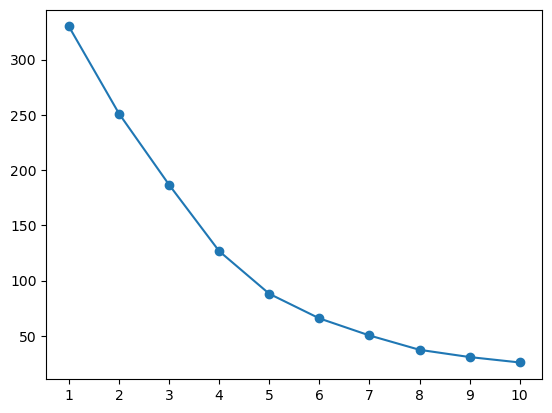

In [99]:
# 3. best cluster 찾기 
plt.plot(size, inertia, '-o')
plt.xticks(size)
plt.show()

In [107]:
# 클러스터링
kmeans = KMeans(n_clusters=7, random_state=10)
clusters = kmeans.fit(scale_f)
data['cluster']= clusters.labels_
data['cluster'].value_counts()

1    32
3    20
5     6
6     3
0     3
2     1
4     1
Name: cluster, dtype: int64

In [116]:
data_1 = data[data['cluster']==1]
data_2 = data[data['cluster']==3]
data_3 =data[data['cluster']==5]

#data_1.to_csv("cluster1.csv")
data_2.to_csv("cluster2.csv")
data_3.to_csv("cluster3.csv")

In [123]:
data_1

,국가명,국내총생산,1인당 총생산,대출금리,무역수지,환율,cluster
1,가이아나,4.300000e+09,54680.0,8.88,"26,684",208.50,1
4,그레나다,1.000000e+09,91860.0,6.55,"2,744",2.70,1
5,나미비아,1.100000e+10,42110.0,6.86,"-6,970",14.78,1
6,남아프리카공화국,3.020000e+11,5090.0,7.04,"-2,624,803",14.78,1
7,노르웨이,3.620000e+11,67330.0,2.27,"-989,545",8.59,1
11,루마니아,2.450000e+11,127570.0,5.61,"-262,370",4.16,1
13,말레이시아,3.280000e+11,113990.0,3.44,"-3,775,582",4.14,1
14,멕시코,1.080000e+12,84210.0,4.89,"4,076,840",20.27,1
16,모리셔스,1.090000e+10,80.0,6.87,"37,168",41.69,1
18,몬테네그로,5.490000e+09,87280.0,5.76,"-317,190",0.85,1


In [122]:
df_0= pd.read_csv("군집1.csv")
df_0

,국가명,무역수지,국내총생산,1인당 총생산,환율,대출금리,cluster
0,인도,"9,972,967",2.590000e+12,18760.0,73.92,8.70,0
1,멕시코,"4,076,840",1.080000e+12,84210.0,20.27,4.89,0
2,방글라데시,"1,679,686",3.490000e+11,20640.0,85.08,7.32,0
3,태국,"707,474",5.130000e+11,73360.0,31.98,3.06,0
4,요르단,"675,596",4.260000e+10,4170.0,0.71,7.03,0
5,파나마,"576,983",5.290000e+10,123730.0,1.00,6.94,0
6,바하마,"535,864",1.130000e+10,292210.0,1.00,4.25,0
7,피지,"274,704",4.545000e+09,5070.0,2.07,5.94,0
8,콜롬비아,"125,005",2.720000e+11,53360.0,3743.59,9.34,0
9,코스타리카,"40,768",6.150000e+10,119820.0,620.79,5.51,0


In [126]:
df_diff = pd.concat([df_0, data_1]).drop_duplicates(keep=False)
df_diff

,국가명,무역수지,국내총생산,1인당 총생산,환율,대출금리,cluster
0,인도,"9,972,967",2.590000e+12,18760.0,73.92,8.7,0
1,멕시코,"4,076,840",1.080000e+12,84210.0,20.27,4.89,0
2,방글라데시,"1,679,686",3.490000e+11,20640.0,85.08,7.32,0
3,태국,"707,474",5.130000e+11,73360.0,31.98,3.06,0
4,요르단,"675,596",4.260000e+10,4170.0,0.71,7.03,0
...,...,...,...,...,...,...,...
68,태국,"707,474",5.130000e+11,73360.0,31.98,3.06,1
69,통가,-723,4.980000e+08,47140.0,2.27,7.76,1
70,파나마,"576,983",5.290000e+10,123730.0,1.00,6.94,1
73,페루,"-2,069,271",2.040000e+11,60830.0,3.88,10.98,1
